# MSc Data Science and Analytics

## Dissertation Project : AVIATION ISLANDS

The single airport island nations’ data were gathered from various source including World Bank’s Dataset. This project aims at cleaning this ambiguous data with a lot of missing values using appropriate imputation methods wherever necessary and form a subset for various aviation island nations the data for a period of thirteen years.

To find correlation of the datapoints generated by these island’s data for each year to discover various attribute’s dependency and find corelation between islands based on a specific attribute to draw hypothesis based on certain pattern of growth. Applying various data visualising techniques to answer specific queries on finding similarities and inter-relationships such as area, population etc of different islands.

### Prerequisite Packages
Importing various python packages and function required for the project code to function. (Takes around 5 seconds to execute)

In [244]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

## Part 1: Data Cleaning and Imputation

Importing data from the original Microsoft Excel file considering all the sheets.

In [245]:
# To display the whole dataframe in one view without needing to scroll through.

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [246]:
# As the mojority of data is in "Sheet 5" of the original dataset,
# saving the extracted data in the variable "dfs" as dataframe.

dfs = pd.read_excel("../Dataset/world bank international arrivals islands v2.xls", sheet_name="Sheet5", header=1)
dfs = dfs.dropna(axis=0, how='all')

In [247]:
# Display first few rows of the dataframe.

dfs.head()

,country,year,pop,areakm2,gdpnom,flights - WB,hotels,hotrooms,expend,receipt,ovnarriv,dayvisit,crusvis,arrpleas,arrbus,arrair,arrwat,emptour,carrycap,exptour,expbus,travx,travpas,arrafr,arram,arreap,arreur,arrme,arrse,arroth,arrausl,arrbel,araus,arrfra,arrger,arrchn,arrit,arrnet,arrswz,arrind,arruae,arrreu,arrsey,arrspa,arrsin,arrsaf,arrrus,arrswe,arruk,arrmad,ocrooms,ocbed,avstay,avcap,intrxgdp,ottexpdg,tbalgdp,topen,tcov,intxexg,intxexs,intxexal,intxcac,oteximg,otxims,otximal,otxcad
0,1,0,1187000,2040,.,12162,.,.,.,732000000,656000,22000,11000,651000,27000,646000,10000,.,.,.,.,542,190,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,NaN,.,.,.,.,.
1,1,1,1189800,2040,4684000000,12269,95,9024,.,820000000,660000,15000,6000,648000,27000,650000,10000,.,.,467,156,623,197,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
2,1,2,1200200,2040,4911000000,12720,95,9623,.,829000000,682000,27000,18000,680000,29000,668000,14000,.,.,385,227,612,217,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
3,1,3,1210400,2040,5825000000,12969,97,9647,.,960000000,702000,20000,9000,691000,31000,690000,12000,.,.,452,245,697,263,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
4,1,4,1220500,2040,6594000000,14791,103,10640,.,1156000000,719000,20000,9000,709000,30000,708000,11000,.,.,525,331,856,300,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.


### 1.1 Initial Analysis of Data

The dataframe in "dfs" has too many unwnted rows where the coulmun name's description are repeated many a times.

In [248]:
# Removing those columns to obtain a clean numerical data in the cells.

dfs = dfs.drop([15,16,32,33,34,48,51,52,68,69,87,88,104,105,119,120,121,136,137,153,154,172,173,190,191,207,208,225,226,241,242,257,258,276,277,293,294,295,312,313,327,330,331,346,347,362,363,378,379,396,397,412,413,430,431,446,447,461], axis=0)
dfs.iloc[20:30]

,country,year,pop,areakm2,gdpnom,flights - WB,hotels,hotrooms,expend,receipt,ovnarriv,dayvisit,crusvis,arrpleas,arrbus,arrair,arrwat,emptour,carrycap,exptour,expbus,travx,travpas,arrafr,arram,arreap,arreur,arrme,arrse,arroth,arrausl,arrbel,araus,arrfra,arrger,arrchn,arrit,arrnet,arrswz,arrind,arruae,arrreu,arrsey,arrspa,arrsin,arrsaf,arrrus,arrswe,arruk,arrmad,ocrooms,ocbed,avstay,avcap,intrxgdp,ottexpdg,tbalgdp,topen,tcov,intxexg,intxexs,intxexal,intxcac,oteximg,otxims,otximal,otxcad
24,2,7,85000,451,1039000000,20727,103,2710,.,396000000,161000,10000,10000,153000,8000,159000,2000,.,1.89,260,65,326,70,17,4,4,130,5,2,.,844,2245,3316,31894,19421,1066,25546,1368,5467,1110,3035,2347,3159,3420,392,8106,5931,1052,16372,277,58,56,.,64.21,38.9,7.2,31.7,46,542.5,99.6,63,38.6,37.8,10.7,16,6.4,6.4
25,2,8,87000,451,962000000,11896,107,2360,.,408000000,159000,14000,14000,149000,10000,156000,3000,.,1.83,247,62,309,99,19,4,3,125,5,2,.,697,2225,3070,31386,21222,843,23818,1377,5268,1241,3553,2834,4086,2495,523,8219,6569,952,13755,687,60,57,.,55.66,44.3,7,37.4,51.3,637.5,93.2,66.9,38.9,37.4,7.6,17.6,5.3,5.3
26,2,9,87000,451,841000000,11238,115,2490,.,349000000,158000,20000,20000,147000,10000,155000,2000,.,1.81,205,51,257,92,18,5,4,122,6,2,.,675,2185,2852,31341,19736,919,26114,1297,5597,1616,3842,3389,3476,2599,511,8208,8098,756,11292,316,56,54,.,57.85,44.3,7,37.3,51.3,634.5,80.8,58.1,33.8,31.8,7.5,14.4,4.9,4.9
27,2,10,90000,451,973000000,12989,124,2510,.,352000000,175000,16000,16000,165000,10000,174000,1000,.,2.02,219,55,274,78,22,4,4,132,8,4,.,928,2247,3446,35026,21314,1078,25602,1435,6523,2671,5387,4483,3631,2627,625,10425,8942,983,12322,349,58,57,.,61.02,.,.,.,.,558.7,87.9,59.5,35.5,33.8,8.6,14.7,5.4,5.3
28,2,11,87000,451,1060000000,14202,132,.,.,378000000,194000,.,.,187000,7000,193000,1000,.,2.26,236,55,291,87,24,5,6,144,12,3,.,980,2512,3745,39370,23706,2124,25674,1747,7644,2380,8488,4789,3867,2769,526,10559,8840,1084,13335,590,.,.,.,.,.,.,.,.,581.5,79.1,61.5,34.6,32.8,7.4,15.4,5,4.9
29,2,12,.,451,1031000000,11878,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,NaN,.,.,.,.,.,NaN,NaN,NaN,NaN,NaN,.,.,.,.,.,.,.,.
35,3,0,777000,440,788000000,62070,NaN,NaN,.,291000000,207000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,3,1,792000,440,778000000,72001,NaN,NaN,.,272000000,215000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,3,2,805000,440,807000000,63361,NaN,NaN,.,274000000,218000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,3,3,817000,440,849000000,67163,NaN,NaN,.,300000000,239000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
# dfs.to_csv('data.csv',header=True,index=False)

### 1.2 Assigning the labels

Assigning the islands country names to its respective country code in the dataframe.

In [250]:
country = ['Mauritius','Seychelles','Antigua and Barbuda','Grenada','Bahrain','Barbados','Bermuda','Cape Verde','Comoros','Dominica','Kiribati','Maldives','Malta','Marshall Islands','Fed Micro','Samoa','Sao Tome & Principe','St Kitts and Nevis','St Lucia','Cayman Islands','St Vincent & Grenadines','Tonga','Tuvalu','Palau','Singapore','Trinidad and Tobago','Solomon']
print("Initial number of Island Countries (Prior to Pre-Processing):",len(country))
codes = list(range(1,28))
dfs['country'] = dfs['country'].replace(codes,country)
dfs.to_csv('data.csv',header=True,index=False)

# Removing the countries which have most of its data columns missing.

remove_countries = ["Grenada","Barbados","Bermuda","Comoros","Dominica","Kiribati","Fed Micro","St Kitts and Nevis","St Lucia","Cayman Islands","St Vincent & Grenadines","Tuvalu","Palau","Marshall Islands","Cape Verde"]
print("Number of Island Countries to remove:",len(remove_countries))

Initial number of Island Countries (Prior to Pre-Processing): 27
Number of Island Countries to remove: 15


In [251]:
def remove_rows(data, column, value):
    return data[~data[column].isin(value)]

In [252]:
dfs = remove_rows(dfs, "country", remove_countries)

In [253]:
dfs.to_csv('new_data.csv',header=True,index=False)

In [254]:
dfs = dfs.drop(columns = ['arrwat','arrbus','crusvis','dayvisit','hotels','hotrooms','expend','emptour',
       'carrycap', 'exptour', 'expbus', 'travx', 'travpas', 'arrafr', 'arram',
       'arreap', 'arreur', 'arrme', 'arrse', 'arroth', 'arrausl', 'arrbel',
       'araus', 'arrfra', 'arrger', 'arrchn', 'arrit', 'arrnet', 'arrswz',
       'arrind', 'arruae', 'arrreu', 'arrsey', 'arrspa', 'arrsin', 'arrsaf',
       'arrrus', 'arrswe', 'arruk', 'arrmad', 'ocrooms', 'ocbed', 'avstay',
       'avcap', 'intrxgdp', 'ottexpdg', 'tbalgdp', 'topen'])

In [255]:
dfs.columns

Index(['country', 'year', 'pop', 'areakm2 ', 'gdpnom', 'flights - WB',
       'receipt', 'ovnarriv', 'arrpleas', 'arrair', 'tcov', 'intxexg',
       'intxexs', 'intxexal', 'intxcac', 'oteximg', 'otxims', 'otximal',
       'otxcad'],
      dtype='object')

In [256]:
dfs.to_csv('new.csv',header=True,index=False)

### Pre-Process "Population"

In [257]:
dfs = dfs.replace('.', np.NaN)
dfs["pop"] = dfs["pop"].replace(np.NaN, '')

In [258]:
dfs["pop"] = dfs["pop"].apply(pd.to_numeric, errors='coerce')

In [259]:
dfs.dtypes

country          object
year              int64
pop             float64
areakm2           int64
gdpnom          float64
flights - WB    float64
receipt         float64
ovnarriv        float64
arrpleas        float64
arrair          float64
tcov            float64
intxexg         float64
intxexs         float64
intxexal        float64
intxcac         float64
oteximg         float64
otxims          float64
otximal         float64
otxcad          float64
dtype: object

In [260]:
dfs.loc[dfs.country=="Seychelles","pop"] = dfs.loc[dfs.country=="Seychelles","pop"].replace(np.NaN, dfs[dfs.country=="Seychelles"]["pop"].mean())
dfs.loc[dfs.country=="Antigua and Barbuda","pop"] = dfs.loc[dfs.country=="Antigua and Barbuda","pop"].replace(np.NaN, dfs[dfs.country=="Antigua and Barbuda"]["pop"].mean())
dfs.loc[dfs.country=="Bahrain","pop"] = dfs.loc[dfs.country=="Bahrain","pop"].replace(np.NaN, dfs[dfs.country=="Bahrain"]["pop"].max())
dfs.loc[dfs.country=="Maldives","pop"] = dfs.loc[dfs.country=="Maldives","pop"].replace(np.NaN, dfs[dfs.country=="Maldives"]["pop"].max())
dfs.loc[dfs.country=="Malta","pop"] = dfs.loc[dfs.country=="Malta","pop"].replace(np.NaN, dfs[dfs.country=="Malta"]["pop"].max())
dfs.loc[dfs.country=="Samoa","pop"] = dfs.loc[dfs.country=="Samoa","pop"].replace(np.NaN, dfs[dfs.country=="Samoa"]["pop"].max())
dfs.loc[dfs.country=="Sao Tome & Principe","pop"] = dfs.loc[dfs.country=="Sao Tome & Principe","pop"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["pop"].max())
dfs.loc[dfs.country=="Tonga","pop"] = dfs.loc[dfs.country=="Tonga","pop"].replace(np.NaN, dfs[dfs.country=="Tonga"]["pop"].max())
dfs.loc[dfs.country=="Trinidad and Tobago","pop"] = dfs.loc[dfs.country=="Trinidad and Tobago","pop"].replace(np.NaN, dfs[dfs.country=="Trinidad and Tobago"]["pop"].max())
dfs.loc[dfs.country=="Solomon","pop"] = dfs.loc[dfs.country=="Solomon","pop"].replace(np.NaN, dfs[dfs.country=="Solomon"]["pop"].max())

In [261]:
dfs['pop'] = dfs['pop'].astype('int64')

In [262]:
dfs.dtypes

country          object
year              int64
pop               int64
areakm2           int64
gdpnom          float64
flights - WB    float64
receipt         float64
ovnarriv        float64
arrpleas        float64
arrair          float64
tcov            float64
intxexg         float64
intxexs         float64
intxexal        float64
intxcac         float64
oteximg         float64
otxims          float64
otximal         float64
otxcad          float64
dtype: object

### Pre-Process "gdpnom"

In [263]:
dfs.loc[dfs.country=="Mauritius","gdpnom"] = dfs.loc[dfs.country=="Mauritius","gdpnom"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["gdpnom"].min())

### Pre-Process "flights - WB"

In [264]:
dfs.loc[dfs.country=="Bahrain","flights - WB"] = dfs.loc[dfs.country=="Bahrain","flights - WB"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["flights - WB"].median())
dfs.loc[dfs.country=="Maldives","flights - WB"] = dfs.loc[dfs.country=="Maldives","flights - WB"].replace(np.NaN, dfs[dfs.country=="Maldives"]["flights - WB"].median())
dfs.loc[dfs.country=="Samoa","flights - WB"] = dfs.loc[dfs.country=="Samoa","flights - WB"].replace(np.NaN, dfs[dfs.country=="Samoa"]["flights - WB"].median())
dfs.loc[dfs.country=="Sao Tome & Principe","flights - WB"] = dfs.loc[dfs.country=="Sao Tome & Principe","flights - WB"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["flights - WB"].median())
dfs.loc[dfs.country=="Tonga","flights - WB"] = dfs.loc[dfs.country=="Tonga","flights - WB"].replace(np.NaN, dfs[dfs.country=="Tonga"]["flights - WB"].median())

### Pre-Process "receipt"

In [265]:
dfs.loc[dfs.country=="Mauritius","receipt"] = dfs.loc[dfs.country=="Mauritius","receipt"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["receipt"].max())
dfs.loc[dfs.country=="Seychelles","receipt"] = dfs.loc[dfs.country=="Seychelles","receipt"].replace(np.NaN, dfs[dfs.country=="Seychelles"]["receipt"].max())
dfs.loc[dfs.country=="Antigua and Barbuda","receipt"] = dfs.loc[dfs.country=="Antigua and Barbuda","receipt"].replace(np.NaN, dfs[dfs.country=="Antigua and Barbuda"]["receipt"].max())
dfs.loc[dfs.country=="Bahrain","receipt"] = dfs.loc[dfs.country=="Bahrain","receipt"].replace(np.NaN, dfs[dfs.country=="Bahrain"]["receipt"].max())
dfs.loc[dfs.country=="Maldives","receipt"] = dfs.loc[dfs.country=="Maldives","receipt"].replace(np.NaN, dfs[dfs.country=="Maldives"]["receipt"].max())
dfs.loc[dfs.country=="Malta","receipt"] = dfs.loc[dfs.country=="Malta","receipt"].replace(np.NaN, dfs[dfs.country=="Malta"]["receipt"].max())
dfs.loc[dfs.country=="Samoa","receipt"] = dfs.loc[dfs.country=="Samoa","receipt"].replace(np.NaN, dfs[dfs.country=="Samoa"]["receipt"].max())
dfs.loc[dfs.country=="Sao Tome & Principe","receipt"] = dfs.loc[dfs.country=="Sao Tome & Principe","receipt"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["receipt"].max())
dfs.loc[dfs.country=="Tonga","receipt"] = dfs.loc[dfs.country=="Tonga","receipt"].replace(np.NaN, dfs[dfs.country=="Tonga"]["receipt"].max())
dfs.loc[dfs.country=="Singapore","receipt"] = dfs.loc[dfs.country=="Singapore","receipt"].replace(np.NaN, dfs[dfs.country=="Singapore"]["receipt"].max())
dfs.loc[dfs.country=="Trinidad and Tobago","receipt"] = dfs.loc[dfs.country=="Trinidad and Tobago","receipt"].replace(np.NaN, dfs[dfs.country=="Trinidad and Tobago"]["receipt"].max())
dfs.loc[dfs.country=="Solomon","receipt"] = dfs.loc[dfs.country=="Solomon","receipt"].replace(np.NaN, dfs[dfs.country=="Solomon"]["receipt"].max())

### Pre-Process "ovnarriv"

In [266]:
dfs.loc[dfs.country=="Mauritius","ovnarriv"] = dfs.loc[dfs.country=="Mauritius","ovnarriv"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["ovnarriv"].median())
dfs.loc[dfs.country=="Seychelles","ovnarriv"] = dfs.loc[dfs.country=="Seychelles","ovnarriv"].replace(np.NaN, dfs[dfs.country=="Seychelles"]["ovnarriv"].median())
dfs.loc[dfs.country=="Antigua and Barbuda","ovnarriv"] = dfs.loc[dfs.country=="Antigua and Barbuda","ovnarriv"].replace(np.NaN, dfs[dfs.country=="Antigua and Barbuda"]["ovnarriv"].median())
dfs.loc[dfs.country=="Bahrain","ovnarriv"] = dfs.loc[dfs.country=="Bahrain","ovnarriv"].replace(np.NaN, dfs[dfs.country=="Bahrain"]["ovnarriv"].median())
dfs.loc[dfs.country=="Maldives","ovnarriv"] = dfs.loc[dfs.country=="Maldives","ovnarriv"].replace(np.NaN, dfs[dfs.country=="Maldives"]["ovnarriv"].median())
dfs.loc[dfs.country=="Malta","ovnarriv"] = dfs.loc[dfs.country=="Malta","ovnarriv"].replace(np.NaN, dfs[dfs.country=="Malta"]["ovnarriv"].median())
dfs.loc[dfs.country=="Samoa","ovnarriv"] = dfs.loc[dfs.country=="Samoa","ovnarriv"].replace(np.NaN, dfs[dfs.country=="Samoa"]["ovnarriv"].median())
dfs.loc[dfs.country=="Sao Tome & Principe","ovnarriv"] = dfs.loc[dfs.country=="Sao Tome & Principe","ovnarriv"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["ovnarriv"].median())
dfs.loc[dfs.country=="Tonga","ovnarriv"] = dfs.loc[dfs.country=="Tonga","ovnarriv"].replace(np.NaN, dfs[dfs.country=="Tonga"]["ovnarriv"].median())
dfs.loc[dfs.country=="Singapore","ovnarriv"] = dfs.loc[dfs.country=="Singapore","ovnarriv"].replace(np.NaN, dfs[dfs.country=="Singapore"]["ovnarriv"].median())
dfs.loc[dfs.country=="Trinidad and Tobago","ovnarriv"] = dfs.loc[dfs.country=="Trinidad and Tobago","ovnarriv"].replace(np.NaN, dfs[dfs.country=="Trinidad and Tobago"]["ovnarriv"].median())
dfs.loc[dfs.country=="Solomon","ovnarriv"] = dfs.loc[dfs.country=="Solomon","ovnarriv"].replace(np.NaN, dfs[dfs.country=="Solomon"]["ovnarriv"].median())

### Pre-Process "arrpleas"

In [267]:
dfs.loc[dfs.country=="Mauritius","arrpleas"] = dfs.loc[dfs.country=="Mauritius","arrpleas"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["arrpleas"].median())
dfs.loc[dfs.country=="Seychelles","arrpleas"] = dfs.loc[dfs.country=="Seychelles","arrpleas"].replace(np.NaN, dfs[dfs.country=="Seychelles"]["arrpleas"].median())
dfs.loc[dfs.country=="Antigua and Barbuda","arrpleas"] = dfs.loc[dfs.country=="Antigua and Barbuda","arrpleas"].replace(np.NaN, dfs[dfs.country=="Antigua and Barbuda"]["arrpleas"].median())
dfs.loc[dfs.country=="Bahrain","arrpleas"] = dfs.loc[dfs.country=="Bahrain","arrpleas"].replace(np.NaN, dfs[dfs.country=="Bahrain"]["arrpleas"].median())
dfs.loc[dfs.country=="Maldives","arrpleas"] = dfs.loc[dfs.country=="Maldives","arrpleas"].replace(np.NaN, dfs[dfs.country=="Maldives"]["arrpleas"].median())
dfs.loc[dfs.country=="Malta","arrpleas"] = dfs.loc[dfs.country=="Malta","arrpleas"].replace(np.NaN, dfs[dfs.country=="Malta"]["arrpleas"].median())
dfs.loc[dfs.country=="Samoa","arrpleas"] = dfs.loc[dfs.country=="Samoa","arrpleas"].replace(np.NaN, dfs[dfs.country=="Samoa"]["arrpleas"].median())
dfs.loc[dfs.country=="Sao Tome & Principe","arrpleas"] = dfs.loc[dfs.country=="Sao Tome & Principe","arrpleas"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["arrpleas"].median())
dfs.loc[dfs.country=="Tonga","arrpleas"] = dfs.loc[dfs.country=="Tonga","arrpleas"].replace(np.NaN, dfs[dfs.country=="Tonga"]["arrpleas"].median())
dfs.loc[dfs.country=="Singapore","arrpleas"] = dfs.loc[dfs.country=="Singapore","arrpleas"].replace(np.NaN, dfs[dfs.country=="Singapore"]["arrpleas"].median())
dfs.loc[dfs.country=="Trinidad and Tobago","arrpleas"] = dfs.loc[dfs.country=="Trinidad and Tobago","arrpleas"].replace(np.NaN, dfs[dfs.country=="Trinidad and Tobago"]["arrpleas"].median())
dfs.loc[dfs.country=="Solomon","arrpleas"] = dfs.loc[dfs.country=="Solomon","arrpleas"].replace(np.NaN, dfs[dfs.country=="Solomon"]["arrpleas"].median())

### Pre-Process "arrair"

In [268]:
dfs.loc[dfs.country=="Mauritius","arrair"] = dfs.loc[dfs.country=="Mauritius","arrair"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["arrair"].median())
dfs.loc[dfs.country=="Seychelles","arrair"] = dfs.loc[dfs.country=="Seychelles","arrair"].replace(np.NaN, dfs[dfs.country=="Seychelles"]["arrair"].median())
dfs.loc[dfs.country=="Antigua and Barbuda","arrair"] = dfs.loc[dfs.country=="Antigua and Barbuda","arrair"].replace(np.NaN, dfs[dfs.country=="Antigua and Barbuda"]["arrair"].median())
dfs.loc[dfs.country=="Bahrain","arrair"] = dfs.loc[dfs.country=="Bahrain","arrair"].replace(np.NaN, dfs[dfs.country=="Bahrain"]["arrair"].median())
dfs.loc[dfs.country=="Maldives","arrair"] = dfs.loc[dfs.country=="Maldives","arrair"].replace(np.NaN, dfs[dfs.country=="Maldives"]["arrair"].median())
dfs.loc[dfs.country=="Malta","arrair"] = dfs.loc[dfs.country=="Malta","arrair"].replace(np.NaN, dfs[dfs.country=="Malta"]["arrair"].median())
dfs.loc[dfs.country=="Samoa","arrair"] = dfs.loc[dfs.country=="Samoa","arrair"].replace(np.NaN, dfs[dfs.country=="Samoa"]["arrair"].median())
dfs.loc[dfs.country=="Sao Tome & Principe","arrair"] = dfs.loc[dfs.country=="Sao Tome & Principe","arrair"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["arrair"].median())
dfs.loc[dfs.country=="Tonga","arrair"] = dfs.loc[dfs.country=="Tonga","arrair"].replace(np.NaN, dfs[dfs.country=="Tonga"]["arrair"].median())
dfs.loc[dfs.country=="Singapore","arrair"] = dfs.loc[dfs.country=="Singapore","arrair"].replace(np.NaN, dfs[dfs.country=="Singapore"]["arrair"].median())
dfs.loc[dfs.country=="Trinidad and Tobago","arrair"] = dfs.loc[dfs.country=="Trinidad and Tobago","arrair"].replace(np.NaN, dfs[dfs.country=="Trinidad and Tobago"]["arrair"].median())
dfs.loc[dfs.country=="Solomon","arrair"] = dfs.loc[dfs.country=="Solomon","arrair"].replace(np.NaN, dfs[dfs.country=="Solomon"]["arrair"].median())

In [269]:
dfs.iloc[:]

,country,year,pop,areakm2,gdpnom,flights - WB,receipt,ovnarriv,arrpleas,arrair,tcov,intxexg,intxexs,intxexal,intxcac,oteximg,otxims,otximal,otxcad
0,Mauritius,0,1187000,2040,4.684000e+09,12162.0,7.320000e+08,656000.0,651000.0,646000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mauritius,1,1189800,2040,4.684000e+09,12269.0,8.200000e+08,660000.0,648000.0,650000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mauritius,2,1200200,2040,4.911000e+09,12720.0,8.290000e+08,682000.0,680000.0,668000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mauritius,3,1210400,2040,5.825000e+09,12969.0,9.600000e+08,702000.0,691000.0,690000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mauritius,4,1220500,2040,6.594000e+09,14791.0,1.156000e+09,719000.0,709000.0,708000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Mauritius,5,1243000,2040,6.489000e+09,14743.0,1.189000e+09,761000.0,751000.0,748000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Mauritius,6,1240800,2040,6.732000e+09,13692.0,1.302000e+09,788000.0,775000.0,775000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Mauritius,7,1250900,2040,7.792000e+09,12090.0,1.663000e+09,907000.0,898000.0,895000.0,433.1,74.3,75.4,37.4,30.2,10.5,24.5,7.3,6.2
8,Mauritius,8,1274200,2040,9.641000e+09,11742.0,1.823000e+09,930000.0,933000.0,914000.0,372.8,76.5,71.7,37.0,29.6,11.1,25.5,7.8,6.7
9,Mauritius,9,1284300,2040,8.824000e+09,11144.0,1.390000e+09,871000.0,861000.0,848000.0,362.0,71.7,62.1,33.3,27.5,11.0,23.9,7.5,6.7


#### tcov, intxexg, intxexs, intxexal, intxcac, oteximg, otxims, otximal, otxcad

In [270]:
dfs.loc[dfs.country=="Mauritius","tcov"] = dfs.loc[dfs.country=="Mauritius","tcov"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["tcov"].median())
dfs.loc[dfs.country=="Seychelles","tcov"] = dfs.loc[dfs.country=="Seychelles","tcov"].replace(np.NaN, dfs[dfs.country=="Seychelles"]["tcov"].median())
dfs.loc[dfs.country=="Antigua and Barbuda","tcov"] = dfs.loc[dfs.country=="Antigua and Barbuda","tcov"].replace(np.NaN, dfs[dfs.country=="Antigua and Barbuda"]["tcov"].median())
dfs.loc[dfs.country=="Bahrain","tcov"] = dfs.loc[dfs.country=="Bahrain","tcov"].replace(np.NaN, dfs[dfs.country=="Bahrain"]["tcov"].median())
dfs.loc[dfs.country=="Maldives","tcov"] = dfs.loc[dfs.country=="Maldives","tcov"].replace(np.NaN, dfs[dfs.country=="Maldives"]["tcov"].median())
dfs.loc[dfs.country=="Malta","tcov"] = dfs.loc[dfs.country=="Malta","tcov"].replace(np.NaN, dfs[dfs.country=="Malta"]["tcov"].median())
dfs.loc[dfs.country=="Samoa","tcov"] = dfs.loc[dfs.country=="Samoa","tcov"].replace(np.NaN, dfs[dfs.country=="Samoa"]["tcov"].median())
dfs.loc[dfs.country=="Sao Tome & Principe","tcov"] = dfs.loc[dfs.country=="Sao Tome & Principe","tcov"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["tcov"].median())
dfs.loc[dfs.country=="Tonga","tcov"] = dfs.loc[dfs.country=="Tonga","tcov"].replace(np.NaN, dfs[dfs.country=="Tonga"]["tcov"].median())
dfs.loc[dfs.country=="Singapore","tcov"] = dfs.loc[dfs.country=="Singapore","tcov"].replace(np.NaN, dfs[dfs.country=="Singapore"]["tcov"].median())
dfs.loc[dfs.country=="Trinidad and Tobago","tcov"] = dfs.loc[dfs.country=="Trinidad and Tobago","tcov"].replace(np.NaN, dfs[dfs.country=="Trinidad and Tobago"]["tcov"].median())
dfs.loc[dfs.country=="Solomon","tcov"] = dfs.loc[dfs.country=="Solomon","tcov"].replace(np.NaN, dfs[dfs.country=="Solomon"]["tcov"].median())

In [271]:
dfs.loc[dfs.country=="Mauritius","intxexg"] = dfs.loc[dfs.country=="Mauritius","intxexg"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["intxexg"].median())
dfs.loc[dfs.country=="Seychelles","intxexg"] = dfs.loc[dfs.country=="Seychelles","intxexg"].replace(np.NaN, dfs[dfs.country=="Seychelles"]["intxexg"].median())
dfs.loc[dfs.country=="Antigua and Barbuda","intxexg"] = dfs.loc[dfs.country=="Antigua and Barbuda","intxexg"].replace(np.NaN, dfs[dfs.country=="Antigua and Barbuda"]["intxexg"].median())
dfs.loc[dfs.country=="Bahrain","intxexg"] = dfs.loc[dfs.country=="Bahrain","intxexg"].replace(np.NaN, dfs[dfs.country=="Bahrain"]["intxexg"].median())
dfs.loc[dfs.country=="Maldives","intxexg"] = dfs.loc[dfs.country=="Maldives","intxexg"].replace(np.NaN, dfs[dfs.country=="Maldives"]["intxexg"].median())
dfs.loc[dfs.country=="Malta","intxexg"] = dfs.loc[dfs.country=="Malta","intxexg"].replace(np.NaN, dfs[dfs.country=="Malta"]["intxexg"].median())
dfs.loc[dfs.country=="Samoa","intxexg"] = dfs.loc[dfs.country=="Samoa","intxexg"].replace(np.NaN, dfs[dfs.country=="Samoa"]["intxexg"].median())
dfs.loc[dfs.country=="Sao Tome & Principe","intxexg"] = dfs.loc[dfs.country=="Sao Tome & Principe","intxexg"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["intxexg"].median())
dfs.loc[dfs.country=="Tonga","intxexg"] = dfs.loc[dfs.country=="Tonga","intxexg"].replace(np.NaN, dfs[dfs.country=="Tonga"]["intxexg"].median())
dfs.loc[dfs.country=="Singapore","intxexg"] = dfs.loc[dfs.country=="Singapore","intxexg"].replace(np.NaN, dfs[dfs.country=="Singapore"]["intxexg"].median())
dfs.loc[dfs.country=="Trinidad and Tobago","intxexg"] = dfs.loc[dfs.country=="Trinidad and Tobago","intxexg"].replace(np.NaN, dfs[dfs.country=="Trinidad and Tobago"]["intxexg"].median())
dfs.loc[dfs.country=="Solomon","intxexg"] = dfs.loc[dfs.country=="Solomon","intxexg"].replace(np.NaN, dfs[dfs.country=="Solomon"]["intxexg"].median())

In [272]:
dfs.loc[dfs.country=="Mauritius","intxexs"] = dfs.loc[dfs.country=="Mauritius","intxexs"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["intxexs"].median())
dfs.loc[dfs.country=="Seychelles","intxexs"] = dfs.loc[dfs.country=="Seychelles","intxexs"].replace(np.NaN, dfs[dfs.country=="Seychelles"]["intxexs"].median())
dfs.loc[dfs.country=="Antigua and Barbuda","intxexs"] = dfs.loc[dfs.country=="Antigua and Barbuda","intxexs"].replace(np.NaN, dfs[dfs.country=="Antigua and Barbuda"]["intxexs"].median())
dfs.loc[dfs.country=="Bahrain","intxexs"] = dfs.loc[dfs.country=="Bahrain","intxexs"].replace(np.NaN, dfs[dfs.country=="Bahrain"]["intxexs"].median())
dfs.loc[dfs.country=="Maldives","intxexs"] = dfs.loc[dfs.country=="Maldives","intxexs"].replace(np.NaN, dfs[dfs.country=="Maldives"]["intxexs"].median())
dfs.loc[dfs.country=="Malta","intxexs"] = dfs.loc[dfs.country=="Malta","intxexs"].replace(np.NaN, dfs[dfs.country=="Malta"]["intxexs"].median())
dfs.loc[dfs.country=="Samoa","intxexs"] = dfs.loc[dfs.country=="Samoa","intxexs"].replace(np.NaN, dfs[dfs.country=="Samoa"]["intxexs"].median())
dfs.loc[dfs.country=="Sao Tome & Principe","intxexs"] = dfs.loc[dfs.country=="Sao Tome & Principe","intxexs"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["intxexs"].median())
dfs.loc[dfs.country=="Tonga","intxexs"] = dfs.loc[dfs.country=="Tonga","intxexs"].replace(np.NaN, dfs[dfs.country=="Tonga"]["intxexs"].median())
dfs.loc[dfs.country=="Singapore","intxexs"] = dfs.loc[dfs.country=="Singapore","intxexs"].replace(np.NaN, dfs[dfs.country=="Singapore"]["intxexs"].median())
dfs.loc[dfs.country=="Trinidad and Tobago","intxexs"] = dfs.loc[dfs.country=="Trinidad and Tobago","intxexs"].replace(np.NaN, dfs[dfs.country=="Trinidad and Tobago"]["intxexs"].median())
dfs.loc[dfs.country=="Solomon","intxexs"] = dfs.loc[dfs.country=="Solomon","intxexs"].replace(np.NaN, dfs[dfs.country=="Solomon"]["intxexs"].median())

In [273]:
dfs.loc[dfs.country=="Mauritius","intxexal"] = dfs.loc[dfs.country=="Mauritius","intxexal"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["intxexal"].median())
dfs.loc[dfs.country=="Seychelles","intxexal"] = dfs.loc[dfs.country=="Seychelles","intxexal"].replace(np.NaN, dfs[dfs.country=="Seychelles"]["intxexal"].median())
dfs.loc[dfs.country=="Antigua and Barbuda","intxexal"] = dfs.loc[dfs.country=="Antigua and Barbuda","intxexal"].replace(np.NaN, dfs[dfs.country=="Antigua and Barbuda"]["intxexal"].median())
dfs.loc[dfs.country=="Bahrain","intxexal"] = dfs.loc[dfs.country=="Bahrain","intxexal"].replace(np.NaN, dfs[dfs.country=="Bahrain"]["intxexal"].median())
dfs.loc[dfs.country=="Maldives","intxexal"] = dfs.loc[dfs.country=="Maldives","intxexal"].replace(np.NaN, dfs[dfs.country=="Maldives"]["intxexal"].median())
dfs.loc[dfs.country=="Malta","intxexal"] = dfs.loc[dfs.country=="Malta","intxexal"].replace(np.NaN, dfs[dfs.country=="Malta"]["intxexal"].median())
dfs.loc[dfs.country=="Samoa","intxexal"] = dfs.loc[dfs.country=="Samoa","intxexal"].replace(np.NaN, dfs[dfs.country=="Samoa"]["intxexal"].median())
dfs.loc[dfs.country=="Sao Tome & Principe","intxexal"] = dfs.loc[dfs.country=="Sao Tome & Principe","intxexal"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["intxexal"].median())
dfs.loc[dfs.country=="Tonga","intxexal"] = dfs.loc[dfs.country=="Tonga","intxexal"].replace(np.NaN, dfs[dfs.country=="Tonga"]["intxexal"].median())
dfs.loc[dfs.country=="Singapore","intxexal"] = dfs.loc[dfs.country=="Singapore","intxexal"].replace(np.NaN, dfs[dfs.country=="Singapore"]["intxexal"].median())
dfs.loc[dfs.country=="Trinidad and Tobago","intxexal"] = dfs.loc[dfs.country=="Trinidad and Tobago","intxexal"].replace(np.NaN, dfs[dfs.country=="Trinidad and Tobago"]["intxexal"].median())
dfs.loc[dfs.country=="Solomon","intxexal"] = dfs.loc[dfs.country=="Solomon","intxexal"].replace(np.NaN, dfs[dfs.country=="Solomon"]["intxexal"].median())

In [274]:
dfs.loc[dfs.country=="Mauritius","intxcac"] = dfs.loc[dfs.country=="Mauritius","intxcac"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["intxcac"].median())
dfs.loc[dfs.country=="Seychelles","intxcac"] = dfs.loc[dfs.country=="Seychelles","intxcac"].replace(np.NaN, dfs[dfs.country=="Seychelles"]["intxcac"].median())
dfs.loc[dfs.country=="Antigua and Barbuda","intxcac"] = dfs.loc[dfs.country=="Antigua and Barbuda","intxcac"].replace(np.NaN, dfs[dfs.country=="Antigua and Barbuda"]["intxcac"].median())
dfs.loc[dfs.country=="Bahrain","intxcac"] = dfs.loc[dfs.country=="Bahrain","intxcac"].replace(np.NaN, dfs[dfs.country=="Bahrain"]["intxcac"].median())
dfs.loc[dfs.country=="Maldives","intxcac"] = dfs.loc[dfs.country=="Maldives","intxcac"].replace(np.NaN, dfs[dfs.country=="Maldives"]["intxcac"].median())
dfs.loc[dfs.country=="Malta","intxcac"] = dfs.loc[dfs.country=="Malta","intxcac"].replace(np.NaN, dfs[dfs.country=="Malta"]["intxcac"].median())
dfs.loc[dfs.country=="Samoa","intxcac"] = dfs.loc[dfs.country=="Samoa","intxcac"].replace(np.NaN, dfs[dfs.country=="Samoa"]["intxcac"].median())
dfs.loc[dfs.country=="Sao Tome & Principe","intxcac"] = dfs.loc[dfs.country=="Sao Tome & Principe","intxcac"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["intxcac"].median())
dfs.loc[dfs.country=="Tonga","intxcac"] = dfs.loc[dfs.country=="Tonga","intxcac"].replace(np.NaN, dfs[dfs.country=="Tonga"]["intxcac"].median())
dfs.loc[dfs.country=="Singapore","intxcac"] = dfs.loc[dfs.country=="Singapore","intxcac"].replace(np.NaN, dfs[dfs.country=="Singapore"]["intxcac"].median())
dfs.loc[dfs.country=="Trinidad and Tobago","intxcac"] = dfs.loc[dfs.country=="Trinidad and Tobago","intxcac"].replace(np.NaN, dfs[dfs.country=="Trinidad and Tobago"]["intxcac"].median())
dfs.loc[dfs.country=="Solomon","intxcac"] = dfs.loc[dfs.country=="Solomon","intxcac"].replace(np.NaN, dfs[dfs.country=="Solomon"]["intxcac"].median())

In [275]:
dfs.loc[dfs.country=="Mauritius","oteximg"] = dfs.loc[dfs.country=="Mauritius","oteximg"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["oteximg"].median())
dfs.loc[dfs.country=="Seychelles","oteximg"] = dfs.loc[dfs.country=="Seychelles","oteximg"].replace(np.NaN, dfs[dfs.country=="Seychelles"]["oteximg"].median())
dfs.loc[dfs.country=="Antigua and Barbuda","oteximg"] = dfs.loc[dfs.country=="Antigua and Barbuda","oteximg"].replace(np.NaN, dfs[dfs.country=="Antigua and Barbuda"]["oteximg"].median())
dfs.loc[dfs.country=="Bahrain","oteximg"] = dfs.loc[dfs.country=="Bahrain","oteximg"].replace(np.NaN, dfs[dfs.country=="Bahrain"]["oteximg"].median())
dfs.loc[dfs.country=="Maldives","oteximg"] = dfs.loc[dfs.country=="Maldives","oteximg"].replace(np.NaN, dfs[dfs.country=="Maldives"]["oteximg"].median())
dfs.loc[dfs.country=="Malta","oteximg"] = dfs.loc[dfs.country=="Malta","oteximg"].replace(np.NaN, dfs[dfs.country=="Malta"]["oteximg"].median())
dfs.loc[dfs.country=="Samoa","oteximg"] = dfs.loc[dfs.country=="Samoa","oteximg"].replace(np.NaN, dfs[dfs.country=="Samoa"]["oteximg"].median())
dfs.loc[dfs.country=="Sao Tome & Principe","oteximg"] = dfs.loc[dfs.country=="Sao Tome & Principe","oteximg"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["oteximg"].median())
dfs.loc[dfs.country=="Tonga","oteximg"] = dfs.loc[dfs.country=="Tonga","oteximg"].replace(np.NaN, dfs[dfs.country=="Tonga"]["oteximg"].median())
dfs.loc[dfs.country=="Singapore","oteximg"] = dfs.loc[dfs.country=="Singapore","oteximg"].replace(np.NaN, dfs[dfs.country=="Singapore"]["oteximg"].median())
dfs.loc[dfs.country=="Trinidad and Tobago","oteximg"] = dfs.loc[dfs.country=="Trinidad and Tobago","oteximg"].replace(np.NaN, dfs[dfs.country=="Trinidad and Tobago"]["oteximg"].median())
dfs.loc[dfs.country=="Solomon","oteximg"] = dfs.loc[dfs.country=="Solomon","oteximg"].replace(np.NaN, dfs[dfs.country=="Solomon"]["oteximg"].median())

In [276]:
dfs.loc[dfs.country=="Mauritius","otxims"] = dfs.loc[dfs.country=="Mauritius","otxims"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["otxims"].median())
dfs.loc[dfs.country=="Seychelles","otxims"] = dfs.loc[dfs.country=="Seychelles","otxims"].replace(np.NaN, dfs[dfs.country=="Seychelles"]["otxims"].median())
dfs.loc[dfs.country=="Antigua and Barbuda","otxims"] = dfs.loc[dfs.country=="Antigua and Barbuda","otxims"].replace(np.NaN, dfs[dfs.country=="Antigua and Barbuda"]["otxims"].median())
dfs.loc[dfs.country=="Bahrain","otxims"] = dfs.loc[dfs.country=="Bahrain","otxims"].replace(np.NaN, dfs[dfs.country=="Bahrain"]["otxims"].median())
dfs.loc[dfs.country=="Maldives","otxims"] = dfs.loc[dfs.country=="Maldives","otxims"].replace(np.NaN, dfs[dfs.country=="Maldives"]["otxims"].median())
dfs.loc[dfs.country=="Malta","otxims"] = dfs.loc[dfs.country=="Malta","otxims"].replace(np.NaN, dfs[dfs.country=="Malta"]["otxims"].median())
dfs.loc[dfs.country=="Samoa","otxims"] = dfs.loc[dfs.country=="Samoa","otxims"].replace(np.NaN, dfs[dfs.country=="Samoa"]["otxims"].median())
dfs.loc[dfs.country=="Sao Tome & Principe","otxims"] = dfs.loc[dfs.country=="Sao Tome & Principe","otxims"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["otxims"].median())
dfs.loc[dfs.country=="Tonga","otxims"] = dfs.loc[dfs.country=="Tonga","otxims"].replace(np.NaN, dfs[dfs.country=="Tonga"]["otxims"].median())
dfs.loc[dfs.country=="Singapore","otxims"] = dfs.loc[dfs.country=="Singapore","otxims"].replace(np.NaN, dfs[dfs.country=="Singapore"]["otxims"].median())
dfs.loc[dfs.country=="Trinidad and Tobago","otxims"] = dfs.loc[dfs.country=="Trinidad and Tobago","otxims"].replace(np.NaN, dfs[dfs.country=="Trinidad and Tobago"]["otxims"].median())
dfs.loc[dfs.country=="Solomon","otxims"] = dfs.loc[dfs.country=="Solomon","otxims"].replace(np.NaN, dfs[dfs.country=="Solomon"]["otxims"].median())

In [277]:
dfs.loc[dfs.country=="Mauritius","otximal"] = dfs.loc[dfs.country=="Mauritius","otximal"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["otximal"].median())
dfs.loc[dfs.country=="Seychelles","otximal"] = dfs.loc[dfs.country=="Seychelles","otximal"].replace(np.NaN, dfs[dfs.country=="Seychelles"]["otximal"].median())
dfs.loc[dfs.country=="Antigua and Barbuda","otximal"] = dfs.loc[dfs.country=="Antigua and Barbuda","otximal"].replace(np.NaN, dfs[dfs.country=="Antigua and Barbuda"]["otximal"].median())
dfs.loc[dfs.country=="Bahrain","otximal"] = dfs.loc[dfs.country=="Bahrain","otximal"].replace(np.NaN, dfs[dfs.country=="Bahrain"]["otximal"].median())
dfs.loc[dfs.country=="Maldives","otximal"] = dfs.loc[dfs.country=="Maldives","otximal"].replace(np.NaN, dfs[dfs.country=="Maldives"]["otximal"].median())
dfs.loc[dfs.country=="Malta","otximal"] = dfs.loc[dfs.country=="Malta","otximal"].replace(np.NaN, dfs[dfs.country=="Malta"]["otximal"].median())
dfs.loc[dfs.country=="Samoa","otximal"] = dfs.loc[dfs.country=="Samoa","otximal"].replace(np.NaN, dfs[dfs.country=="Samoa"]["otximal"].median())
dfs.loc[dfs.country=="Sao Tome & Principe","otximal"] = dfs.loc[dfs.country=="Sao Tome & Principe","otximal"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["otximal"].median())
dfs.loc[dfs.country=="Tonga","otximal"] = dfs.loc[dfs.country=="Tonga","otximal"].replace(np.NaN, dfs[dfs.country=="Tonga"]["otximal"].median())
dfs.loc[dfs.country=="Singapore","otximal"] = dfs.loc[dfs.country=="Singapore","otximal"].replace(np.NaN, dfs[dfs.country=="Singapore"]["otximal"].median())
dfs.loc[dfs.country=="Trinidad and Tobago","otximal"] = dfs.loc[dfs.country=="Trinidad and Tobago","otximal"].replace(np.NaN, dfs[dfs.country=="Trinidad and Tobago"]["otximal"].median())
dfs.loc[dfs.country=="Solomon","otximal"] = dfs.loc[dfs.country=="Solomon","otximal"].replace(np.NaN, dfs[dfs.country=="Solomon"]["otximal"].median())

In [278]:
dfs.loc[dfs.country=="Mauritius","otxcad"] = dfs.loc[dfs.country=="Mauritius","otxcad"].replace(np.NaN, dfs[dfs.country=="Mauritius"]["otxcad"].median())
dfs.loc[dfs.country=="Seychelles","otxcad"] = dfs.loc[dfs.country=="Seychelles","otxcad"].replace(np.NaN, dfs[dfs.country=="Seychelles"]["otxcad"].median())
dfs.loc[dfs.country=="Antigua and Barbuda","otxcad"] = dfs.loc[dfs.country=="Antigua and Barbuda","otxcad"].replace(np.NaN, dfs[dfs.country=="Antigua and Barbuda"]["otxcad"].median())
dfs.loc[dfs.country=="Bahrain","otxcad"] = dfs.loc[dfs.country=="Bahrain","otxcad"].replace(np.NaN, dfs[dfs.country=="Bahrain"]["otxcad"].median())
dfs.loc[dfs.country=="Maldives","otxcad"] = dfs.loc[dfs.country=="Maldives","otxcad"].replace(np.NaN, dfs[dfs.country=="Maldives"]["otxcad"].median())
dfs.loc[dfs.country=="Malta","otxcad"] = dfs.loc[dfs.country=="Malta","otxcad"].replace(np.NaN, dfs[dfs.country=="Malta"]["otxcad"].median())
dfs.loc[dfs.country=="Samoa","otxcad"] = dfs.loc[dfs.country=="Samoa","otxcad"].replace(np.NaN, dfs[dfs.country=="Samoa"]["otxcad"].median())
dfs.loc[dfs.country=="Sao Tome & Principe","otxcad"] = dfs.loc[dfs.country=="Sao Tome & Principe","otxcad"].replace(np.NaN, dfs[dfs.country=="Sao Tome & Principe"]["otxcad"].median())
dfs.loc[dfs.country=="Tonga","otxcad"] = dfs.loc[dfs.country=="Tonga","otxcad"].replace(np.NaN, dfs[dfs.country=="Tonga"]["otxcad"].median())
dfs.loc[dfs.country=="Singapore","otxcad"] = dfs.loc[dfs.country=="Singapore","otxcad"].replace(np.NaN, dfs[dfs.country=="Singapore"]["otxcad"].median())
dfs.loc[dfs.country=="Trinidad and Tobago","otxcad"] = dfs.loc[dfs.country=="Trinidad and Tobago","otxcad"].replace(np.NaN, dfs[dfs.country=="Trinidad and Tobago"]["otxcad"].median())
dfs.loc[dfs.country=="Solomon","otxcad"] = dfs.loc[dfs.country=="Solomon","otxcad"].replace(np.NaN, dfs[dfs.country=="Solomon"]["otxcad"].median())

In [279]:
len(dfs)

156

In [280]:
dataset = dfs.assign(arriv = 0)

In [281]:
dfs

,country,year,pop,areakm2,gdpnom,flights - WB,receipt,ovnarriv,arrpleas,arrair,tcov,intxexg,intxexs,intxexal,intxcac,oteximg,otxims,otximal,otxcad
0,Mauritius,0,1187000,2040,4.684000e+09,12162.0,7.320000e+08,656000.0,651000.0,646000.0,374.70,71.70,62.10,33.30,27.50,10.50,23.90,7.30,6.20
1,Mauritius,1,1189800,2040,4.684000e+09,12269.0,8.200000e+08,660000.0,648000.0,650000.0,374.70,71.70,62.10,33.30,27.50,10.50,23.90,7.30,6.20
2,Mauritius,2,1200200,2040,4.911000e+09,12720.0,8.290000e+08,682000.0,680000.0,668000.0,374.70,71.70,62.10,33.30,27.50,10.50,23.90,7.30,6.20
3,Mauritius,3,1210400,2040,5.825000e+09,12969.0,9.600000e+08,702000.0,691000.0,690000.0,374.70,71.70,62.10,33.30,27.50,10.50,23.90,7.30,6.20
4,Mauritius,4,1220500,2040,6.594000e+09,14791.0,1.156000e+09,719000.0,709000.0,708000.0,374.70,71.70,62.10,33.30,27.50,10.50,23.90,7.30,6.20
5,Mauritius,5,1243000,2040,6.489000e+09,14743.0,1.189000e+09,761000.0,751000.0,748000.0,374.70,71.70,62.10,33.30,27.50,10.50,23.90,7.30,6.20
6,Mauritius,6,1240800,2040,6.732000e+09,13692.0,1.302000e+09,788000.0,775000.0,775000.0,374.70,71.70,62.10,33.30,27.50,10.50,23.90,7.30,6.20
7,Mauritius,7,1250900,2040,7.792000e+09,12090.0,1.663000e+09,907000.0,898000.0,895000.0,433.10,74.30,75.40,37.40,30.20,10.50,24.50,7.30,6.20
8,Mauritius,8,1274200,2040,9.641000e+09,11742.0,1.823000e+09,930000.0,933000.0,914000.0,372.80,76.50,71.70,37.00,29.60,11.10,25.50,7.80,6.70
9,Mauritius,9,1284300,2040,8.824000e+09,11144.0,1.390000e+09,871000.0,861000.0,848000.0,362.00,71.70,62.10,33.30,27.50,11.00,23.90,7.50,6.70


In [282]:
dfs.to_csv('ds.csv',header=True,index=False)

PermissionError: [Errno 13] Permission denied: 'ds.csv'

## Principal Component Analysis

In [283]:
features = ['year', 'pop', 'areakm2 ','flights - WB',
      'ovnarriv']
x = dfs.loc[:,features].values
label = pd.DataFrame(data = dfs['country'])



x = StandardScaler().fit_transform(x)

### 1. Basic 2 Componets Principal Analysis

In [284]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [285]:
finalDf = principalDf.assign(country = dfs['country'].values)

In [286]:
fig = px.scatter(principalComponents, x=0, y=1, color=dfs['country'].values, 
                 labels={'0': 'Principal Component 1', '1': 'Principal Component 2'})
fig.show()

### 2. 3D Principal Componets Analysis

In [287]:
pca = PCA(n_components=2)
components_3d = pca.fit_transform(x)

directions = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components_3d, x=0, y=1, color=dfs['country'].values,
                 labels={'0': 'Principal Component 1', '1': 'Principal Component 2'})

for i, feature in enumerate(features):
    fig.add_shape(type='line', x0=0, y0=0, x1=directions[i, 0], y1=directions[i, 1])
    fig.add_annotation(x=directions[i, 0], y=directions[i, 1], ax=0, ay=0, xanchor="center", yanchor="bottom", text=feature,)
fig.show()

In [288]:
pca_var = PCA()
pca_var.fit(x)
exp_var_cumul = np.cumsum(pca_var.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "Number of Components", "y": "Data Points Variance"}
)

### 3. 3D Principal Componets Analysis: with variance explained

In [289]:
pca_3d = PCA(n_components=3)
pca_components = pca_3d.fit_transform(x)

explained_variance = pca_3d.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(pca_components, x=0, y=1, z=2, color=dfs['country'].values,
    title=f'Total Explained Variance Percentage: {explained_variance:.2f}%', labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

In [290]:
finalDf

,principal component 1,principal component 2,country
0,-0.348816,-1.444221,Mauritius
1,-0.321788,-1.220018,Mauritius
2,-0.279815,-0.995640,Mauritius
3,-0.242751,-0.771346,Mauritius
4,-0.172195,-0.546271,Mauritius
5,-0.131001,-0.322048,Mauritius
6,-0.126678,-0.098691,Mauritius
7,-0.108941,0.123910,Mauritius
8,-0.077897,0.348156,Mauritius
9,-0.075986,0.572672,Mauritius


## Clustering Analysis

### Hierarchical Clustering

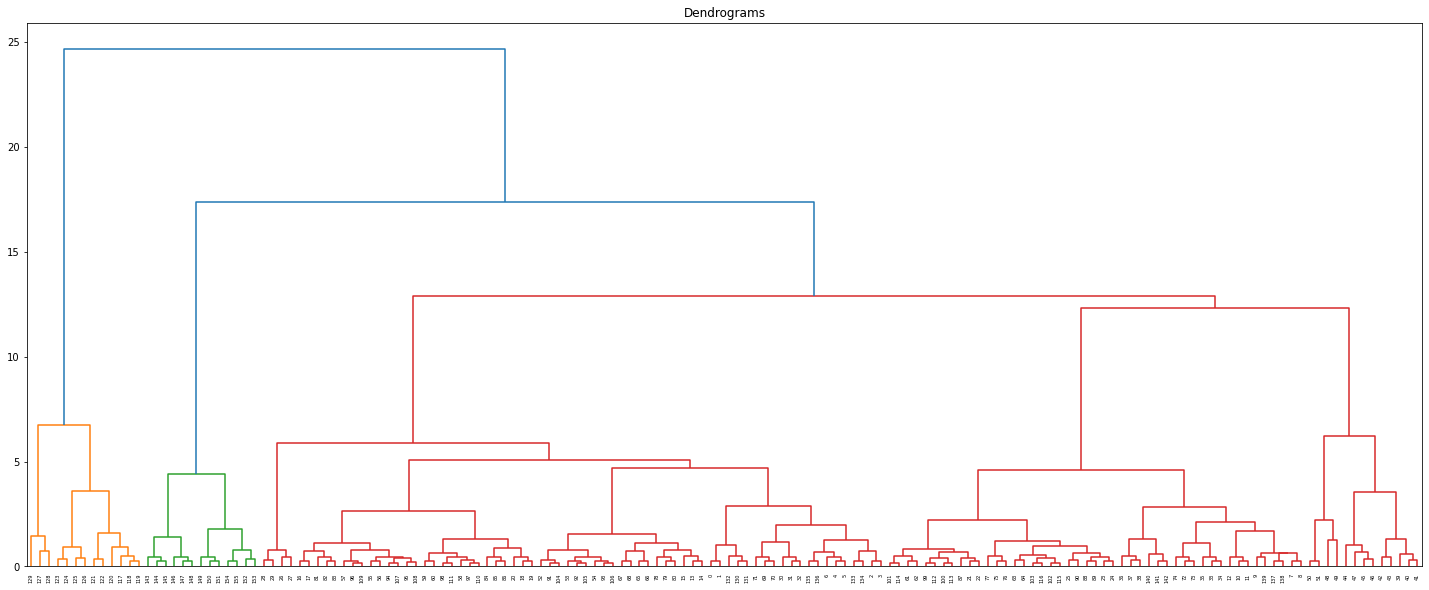

In [291]:

plt.figure(figsize=(25, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))

In [292]:

cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
cluster.fit_predict(x)

array([ 3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  9,  9,  9,  8,
        8,  8,  8,  8,  4,  4,  4,  4,  4,  7,  7,  7,  7,  3,  3,  3,  2,
        2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  6,  6,
        6,  9,  9,  9,  8,  8,  8,  8,  8,  8,  4,  4,  4,  4,  9,  9,  9,
        9,  3,  3,  3,  2,  2,  2,  4,  4,  4,  9,  9,  9,  8,  8,  8,  8,
        8,  8,  4,  4,  4,  4,  9,  9,  9,  8,  8,  8,  8,  8,  4,  4,  4,
        4,  4,  9,  9,  9,  8,  8,  8,  8,  8,  4,  4,  4,  4,  4,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  5,  5,  5,  3,  3,  3,  3,  3,  3,
        3,  2,  2,  2,  2,  2,  2, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10,
       10, 10, 10], dtype=int64)

In [293]:
#dfx = pd.DataFrame(data=numpy_data, index=["row1", "row2"], columns=["column1", "column2"])

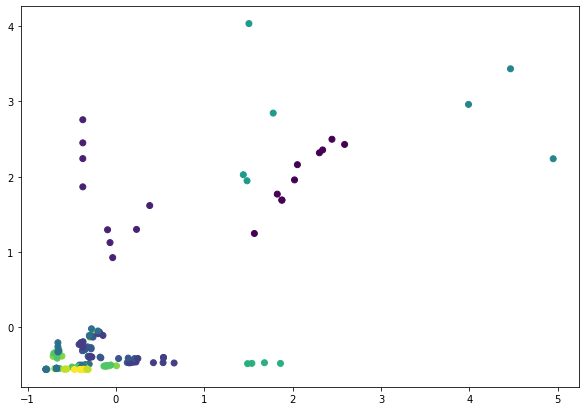

In [294]:
plt.figure(figsize=(10, 7))  
plt.scatter(x[:,3], x[:,4], c=cluster.labels_) 

## Exploratory Analysis

In [295]:
dfs.head()

,country,year,pop,areakm2,gdpnom,flights - WB,receipt,ovnarriv,arrpleas,arrair,tcov,intxexg,intxexs,intxexal,intxcac,oteximg,otxims,otximal,otxcad
0,Mauritius,0,1187000,2040,4.684000e+09,12162.0,7.320000e+08,656000.0,651000.0,646000.0,374.7,71.7,62.1,33.3,27.5,10.5,23.9,7.3,6.2
1,Mauritius,1,1189800,2040,4.684000e+09,12269.0,8.200000e+08,660000.0,648000.0,650000.0,374.7,71.7,62.1,33.3,27.5,10.5,23.9,7.3,6.2
2,Mauritius,2,1200200,2040,4.911000e+09,12720.0,8.290000e+08,682000.0,680000.0,668000.0,374.7,71.7,62.1,33.3,27.5,10.5,23.9,7.3,6.2
3,Mauritius,3,1210400,2040,5.825000e+09,12969.0,9.600000e+08,702000.0,691000.0,690000.0,374.7,71.7,62.1,33.3,27.5,10.5,23.9,7.3,6.2
4,Mauritius,4,1220500,2040,6.594000e+09,14791.0,1.156000e+09,719000.0,709000.0,708000.0,374.7,71.7,62.1,33.3,27.5,10.5,23.9,7.3,6.2


### 1. Islands In-bound flight frequencies

In [296]:
flightFerq = dfs.groupby(['country'])['flights - WB'].mean().round()
flightFerq

country
Antigua and Barbuda    41226.0
Bahrain                32814.0
Maldives                4559.0
Malta                  15575.0
Mauritius              12668.0
Samoa                  11763.0
Sao Tome & Principe     1205.0
Seychelles             17048.0
Singapore              92743.0
Solomon                11259.0
Tonga                   4353.0
Trinidad and Tobago    22041.0
Name: flights - WB, dtype: float64

In [297]:
flights_df = pd.DataFrame(flightFerq).reset_index()
flights_df.columns = ['country', 'flights - WB']

In [298]:
fig = px.line(flights_df, x="country", y="flights - WB", title="Average In-bound flights frequency of Islands",
             labels={"country": "Island Countries", "flights - WB": "In-bound Flights"})
fig.update_traces(textposition="bottom right")
fig.show()

### 2. Finding Trend between Population and GDP

In [299]:
fig = px.scatter(dfs, x="pop", y="gdpnom", color="country", marginal_x="violin",
           marginal_y="box", trendline="ols", template="simple_white")
fig.show()

### 3. Evolution of GDP over the years
This plot shows the evolution of GDP for the islands across the 13 years timeline, it shows the growth pattern of all the island countries.

In [300]:
fig = px.bar(dfs, x='year', y='gdpnom', color='country', labels={'x':'Year','y':'GDP'},
             hover_data=['country'],
             title='Evolution of GDP')
fig.show()

In [380]:
mus = dfs.query('country=="Mauritius"')
syc = dfs.query('country=="Seychelles"')
atg = dfs.query('country=="Antigua and Barbuda"')
bhr = dfs.query('country=="Bahrain"')
mdv = dfs.query('country=="Maldives"')
mlt = dfs.query('country=="Malta"')
wsm = dfs.query('country=="Samoa"')
stp = dfs.query('country=="Sao Tome & Principe"')
ton = dfs.query('country=="Tonga"')
sgp = dfs.query('country=="Trinidad and Tobago"')
tto = dfs.query('country=="Seychelles"')
slb = dfs.query('country=="Solomon"')

i = "intxexg"

lst = [mus[i], syc[i], atg[i], bhr[i], mdv[i], mlt[i], wsm[i], stp[i], ton[i], sgp[i], tto[i], slb[i]]

# Inbound tourism expenditure over exports of goods

labs = ['Mauritius', 'Seychelles', 'Antigua and Barbuda', 'Bahrain',
       'Maldives', 'Malta', 'Samoa', 'Sao Tome & Principe', 'Tonga',
       'Singapore', 'Trinidad and Tobago', 'Solomon']

In [381]:
fig = px.line(x=list(range(13)), y=lst, title="Inbound tourism expenditure over exports of goods")
for idx, name in enumerate(labs):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name
fig.show()

### GDP v Population Trend
Raise in population means, the country is capable of putting more towards increasing its economy. So, to argue the correctness of this point, below is the log-log plot visualisation for population v gdpnom, with the help of trendline we can observe that as the receipt increases, the gdpnorm of a country increase. The purpose of using a log-log scale is to have a better visualisation of this correlation between receipt and gdpnom.

In [399]:
dfs_gdp = dfs.sort_values(by=['pop'])

In [400]:
fig = px.scatter(dfs_arrivals, x="pop", y="gdpnom", title="How Gross Domestic Product increases with Population",
              log_x=True, log_y=True, trendline="ols", labels={"pop":"log(Population)", "gdpnom":"log(GDP Growth)"})
fig.show()

In [303]:
dfs_arrivals = dfs.sort_values(by=['flights - WB'])

In [383]:
fig = px.scatter(dfs_arrivals, x="flights - WB", y="ovnarriv", title="Average In-bound flights frequency of Islands",
              log_x=True, log_y=True, trendline="ols")
             #labels={"country": "Island Countries", "flights - WB": "In-bound Flights"})
fig.update_traces(textposition="bottom right")
fig.show()

In [305]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
import math

In [ ]:
(ggplot(dfs_arrivals, aes(math.log(dfs['receipt']), math.log(dfs['gdpnom']))
 + geom_point()
 + stat_smooth(method='lm')))

In [307]:
dfs.head()

,country,year,pop,areakm2,gdpnom,flights - WB,receipt,ovnarriv,arrpleas,arrair,tcov,intxexg,intxexs,intxexal,intxcac,oteximg,otxims,otximal,otxcad
0,Mauritius,0,1187000,2040,4.684000e+09,12162.0,7.320000e+08,656000.0,651000.0,646000.0,374.7,71.7,62.1,33.3,27.5,10.5,23.9,7.3,6.2
1,Mauritius,1,1189800,2040,4.684000e+09,12269.0,8.200000e+08,660000.0,648000.0,650000.0,374.7,71.7,62.1,33.3,27.5,10.5,23.9,7.3,6.2
2,Mauritius,2,1200200,2040,4.911000e+09,12720.0,8.290000e+08,682000.0,680000.0,668000.0,374.7,71.7,62.1,33.3,27.5,10.5,23.9,7.3,6.2
3,Mauritius,3,1210400,2040,5.825000e+09,12969.0,9.600000e+08,702000.0,691000.0,690000.0,374.7,71.7,62.1,33.3,27.5,10.5,23.9,7.3,6.2
4,Mauritius,4,1220500,2040,6.594000e+09,14791.0,1.156000e+09,719000.0,709000.0,708000.0,374.7,71.7,62.1,33.3,27.5,10.5,23.9,7.3,6.2


In [308]:
maps = dframe.query("year==0")
fig = px.scatter_mapbox(maps,
                        locations="codes"
                        hover_name="name",
                        zoom=1)
fig.show()




SyntaxError: invalid syntax (<ipython-input-308-2a9c1f86cb6c>, line 4)

In [309]:
import plotly.express as px
import geopandas as gpd

geo_df = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(geo_df,
                        lat=geo_df.geometry.y,
                        lon=geo_df.geometry.x,
                        hover_name="name",
                        zoom=1)
fig.show()

ModuleNotFoundError: No module named 'geopandas'

In [310]:
dfs['country'].unique()

array(['Mauritius', 'Seychelles', 'Antigua and Barbuda', 'Bahrain',
       'Maldives', 'Malta', 'Samoa', 'Sao Tome & Principe', 'Tonga',
       'Singapore', 'Trinidad and Tobago', 'Solomon'], dtype=object)

In [311]:
codes = ['MUS','MUS', 'MUS', 'MUS', 'MUS', 'MUS', 'MUS', 'MUS', 'MUS', 'MUS', 'MUS', 'MUS', 'MUS',
         'SYC', 'SYC', 'SYC', 'SYC', 'SYC', 'SYC', 'SYC', 'SYC', 'SYC', 'SYC', 'SYC', 'SYC', 'SYC',
         'ATG', 'ATG', 'ATG', 'ATG', 'ATG', 'ATG', 'ATG', 'ATG', 'ATG', 'ATG', 'ATG', 'ATG', 'ATG',
         'BHR', 'BHR', 'BHR', 'BHR', 'BHR', 'BHR', 'BHR', 'BHR', 'BHR', 'BHR', 'BHR', 'BHR', 'BHR',
         'MDV', 'MDV', 'MDV', 'MDV', 'MDV', 'MDV', 'MDV', 'MDV', 'MDV', 'MDV', 'MDV', 'MDV', 'MDV',
         'MLT', 'MLT', 'MLT', 'MLT', 'MLT', 'MLT', 'MLT', 'MLT', 'MLT', 'MLT', 'MLT', 'MLT', 'MLT',
         'WSM', 'WSM', 'WSM', 'WSM', 'WSM', 'WSM', 'WSM', 'WSM', 'WSM', 'WSM', 'WSM', 'WSM', 'WSM',
         'STP', 'STP', 'STP', 'STP', 'STP', 'STP', 'STP', 'STP', 'STP', 'STP', 'STP', 'STP', 'STP',
         'TON', 'TON', 'TON', 'TON', 'TON', 'TON', 'TON', 'TON', 'TON', 'TON', 'TON', 'TON', 'TON',
         'SGP', 'SGP', 'SGP', 'SGP', 'SGP', 'SGP', 'SGP', 'SGP', 'SGP', 'SGP', 'SGP', 'SGP', 'SGP',
         'TTO', 'TTO', 'TTO', 'TTO', 'TTO', 'TTO', 'TTO', 'TTO', 'TTO', 'TTO', 'TTO', 'TTO', 'TTO',
         'SLB', 'SLB', 'SLB', 'SLB', 'SLB', 'SLB', 'SLB', 'SLB', 'SLB', 'SLB', 'SLB', 'SLB', 'SLB']

In [312]:
dframe = dfs

In [ ]:
dframe['codes'] = codes

In [ ]:
dframe.tail()